In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("urldata.csv")

In [4]:
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()   
data["Label"].unique()
for i in data.columns:
    if(i== "Domain"):
        data[i]= label_encoder.fit_transform(data[i])

In [6]:
X_train , X_test , y_train , y_test = train_test_split(data[['Have_IP' , 'Have_At' , 'URL_Length' , 
                                                             'URL_Depth' ,'Redirection' , 
                                                             'https_Domain' , 'TinyURL' , 'Prefix/Suffix'
                                                             , 'DNS_Record', 'Web_Traffic' , 'Domain_Age' , 'Domain_End' , 'iFrame' , 'Mouse_Over' , 'Right_Click' , 
                                                            'Web_Forwards']] , data['Label'] , train_size=0.2)

In [7]:
X_train

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
7708,0,0,1,5,0,0,0,0,0,1,1,1,0,0,1,0
1138,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0
1098,0,0,1,2,0,0,0,0,0,0,1,1,0,0,1,0
5623,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0
4648,0,0,1,3,0,0,0,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0
8159,0,0,0,3,0,0,1,0,0,1,0,1,0,0,1,0
5148,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0
5378,0,0,1,2,0,0,0,0,0,1,0,1,0,0,1,0


In [8]:
y_train

7708    1
1138    0
1098    0
5623    1
4648    0
       ..
4639    0
8159    1
5148    1
5378    1
3695    0
Name: Label, Length: 2000, dtype: int64

In [9]:
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,1364,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,1027,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,1499,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,1162,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,1513,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [10]:
from sklearn import linear_model
mymodel = linear_model.LogisticRegression()
mymodel.fit(X_train,y_train)

LogisticRegression()

In [11]:
mymodel.predict(X_test)

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [12]:
X_test

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
8241,0,0,0,3,0,0,0,0,0,0,0,1,0,0,1,0
8099,0,1,1,5,0,0,1,0,1,1,1,1,0,0,1,0
7829,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
6755,0,0,0,2,0,0,0,0,0,1,0,1,0,0,1,0
8655,0,0,0,1,0,0,0,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0
6750,0,0,1,3,0,0,0,0,0,0,0,1,0,0,1,0
3951,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0
9749,0,0,0,3,0,0,0,0,0,1,1,1,0,0,1,0


In [13]:
mymodel.score(X_test,y_test)

0.80375

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
feature_df = data[["Domain","Have_IP","Have_At","URL_Length","URL_Depth","Redirection","https_Domain","TinyURL","Prefix/Suffix","DNS_Record","Web_Traffic","Domain_Age","Domain_End","iFrame","Mouse_Over","Right_Click","Web_Forwards"]]
#convert into numpy nd array
# X is independent variable
X = np.asarray(feature_df)
Y = np.asarray(data["Label"])

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mymodel, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Cross-Validation Accuracy Scores [0.85  0.765 0.795 0.815 0.77  0.825 0.82  0.805 0.81  0.795]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    1.8s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    1.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.9s finished

[2022-11-17 20:09:56] Features: 1/17 -- score: 0.7266[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished

[2022-11-17 20:09:56] Features: 2/17 -- score: 0.7757[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.2s finished

[2022-11-17 20:09:56] Features: 3/17 -- sc

(0, 1, 2, 3, 5, 7, 8, 9, 10, 12, 13, 15, 16)


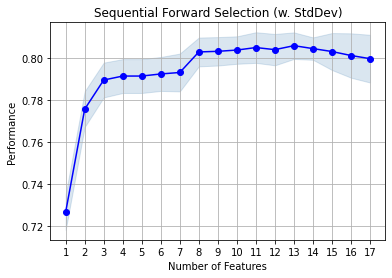

In [15]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(mymodel, 
           k_features=(1, 17), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=5)


sfs1 = sfs1.fit(X, Y)
print(sfs1.k_feature_idx_)
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Cross-Validation Accuracy Scores [0.75510204 0.7755102  0.74489796 0.73469388 0.7755102  0.75510204
 0.66326531 0.81632653 0.7755102  0.78571429]


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2022-11-17 20:10:18] Features: 2/17 -- score: 0.759[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2022-11-17 20:10:18] Features: 3/17 -- score: 0.774[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.0s finished

[2022-11-17 20:10:18] Features: 4/17 -- score: 0.774[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:    0.1s remaining: 

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13)


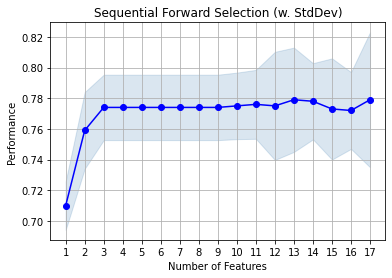

In [16]:
data1 = data.sample(frac=0.1)
feature_df = data1[["Domain","Have_IP","Have_At","URL_Length","URL_Depth","Redirection","https_Domain","TinyURL","Prefix/Suffix","DNS_Record","Web_Traffic","Domain_Age","Domain_End","iFrame","Mouse_Over","Right_Click","Web_Forwards"]]
#convert into numpy nd array
# X is independent variable
X = np.asarray(feature_df)
Y = np.asarray(data1["Label"])
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train,y_test=train_test_split(X,Y, test_size=0.02,random_state=4)
from sklearn import linear_model
mymodel = linear_model.LogisticRegression()
mymodel.fit(X_train,y_train)
mymodel.predict(X_test)
mymodel.score(X_test,y_test)


from sklearn.model_selection import cross_val_score

scores = cross_val_score(mymodel, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)


from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(mymodel, 
           k_features=(1, 17), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=5)


sfs1 = sfs1.fit(X, Y)
print(sfs1.k_feature_idx_)
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Cross-Validation Accuracy Scores [0.83163265 0.75510204 0.76020408 0.79591837 0.75       0.75
 0.80612245 0.77040816 0.80102041 0.76530612]


[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    2.6s remaining:   12.7s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    2.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    2.7s finished

[2022-11-19 16:10:09] Features: 1/17 -- score: 0.7150000000000001[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2022-11-19 16:10:09] Features: 2/17 -- score: 0.7595[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2022-11-19 16:10:09] Features: 3/17 -- score: 0.7689999999999999[Parallel(n_jobs=-1)]: Using backend LokyB

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16)


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2022-11-19 16:10:12] Features: 17/17 -- score: 0.7819999999999999

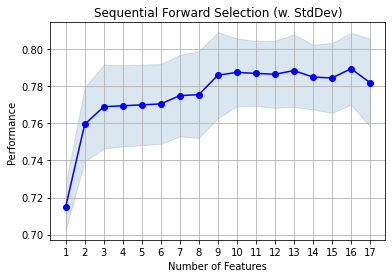

In [17]:
data1 = data.sample(frac=0.2)
feature_df = data1[["Domain","Have_IP","Have_At","URL_Length","URL_Depth","Redirection","https_Domain","TinyURL","Prefix/Suffix","DNS_Record","Web_Traffic","Domain_Age","Domain_End","iFrame","Mouse_Over","Right_Click","Web_Forwards"]]
#convert into numpy nd array
# X is independent variable
X = np.asarray(feature_df)
Y = np.asarray(data1["Label"])
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train,y_test=train_test_split(X,Y, test_size=0.02,random_state=4)
from sklearn import linear_model
mymodel = linear_model.LogisticRegression()
mymodel.fit(X_train,y_train)
mymodel.predict(X_test)
mymodel.score(X_test,y_test)


from sklearn.model_selection import cross_val_score

scores = cross_val_score(mymodel, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)


from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(mymodel, 
           k_features=(1, 17), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=5)


sfs1 = sfs1.fit(X, Y)
print(sfs1.k_feature_idx_)
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Cross-Validation Accuracy Scores [0.82244898 0.7877551  0.80204082 0.79387755 0.8122449  0.82244898
 0.79795918 0.77959184 0.79183673 0.8122449 ]


[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2022-11-19 16:11:11] Features: 1/17 -- score: 0.7218[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished

[2022-11-19 16:11:11] Features: 2/17 -- score: 0.7728[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished

[2022-11-19 16:11:11] Features: 3/17 -- score: 0.788[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.0s remaining

(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)


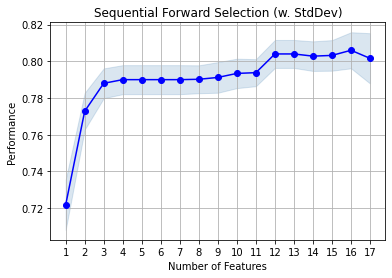

In [18]:
data1 = data.sample(frac=0.5)
feature_df = data1[["Domain","Have_IP","Have_At","URL_Length","URL_Depth","Redirection","https_Domain","TinyURL","Prefix/Suffix","DNS_Record","Web_Traffic","Domain_Age","Domain_End","iFrame","Mouse_Over","Right_Click","Web_Forwards"]]
#convert into numpy nd array
# X is independent variable
X = np.asarray(feature_df)
Y = np.asarray(data1["Label"])
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train,y_test=train_test_split(X,Y, test_size=0.02,random_state=4)
from sklearn import linear_model
mymodel = linear_model.LogisticRegression()
mymodel.fit(X_train,y_train)
mymodel.predict(X_test)
mymodel.score(X_test,y_test)


from sklearn.model_selection import cross_val_score

scores = cross_val_score(mymodel, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)


from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(mymodel, 
           k_features=(1, 17), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=5)


sfs1 = sfs1.fit(X, Y)
print(sfs1.k_feature_idx_)
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Cross-Validation Accuracy Scores [0.83673469 0.85714286 0.71428571 0.7755102  0.81632653 0.7755102
 0.75510204 0.75510204 0.85714286 0.73469388]


[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    2.8s remaining:   13.5s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    2.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    2.9s finished

[2022-11-20 15:00:38] Features: 1/17 -- score: 0.732[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2022-11-20 15:00:38] Features: 2/17 -- score: 0.784[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2022-11-20 15:00:38] Features: 3/17 -- score: 0.7979999999999999[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16)


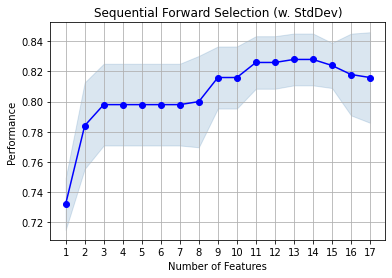

In [16]:
data1 = data.sample(frac=0.05)
feature_df = data1[["Domain","Have_IP","Have_At","URL_Length","URL_Depth","Redirection","https_Domain","TinyURL","Prefix/Suffix","DNS_Record","Web_Traffic","Domain_Age","Domain_End","iFrame","Mouse_Over","Right_Click","Web_Forwards"]]
#convert into numpy nd array
# X is independent variable
X = np.asarray(feature_df)
Y = np.asarray(data1["Label"])
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train,y_test=train_test_split(X,Y, test_size=0.02,random_state=4)
from sklearn import linear_model
mymodel = linear_model.LogisticRegression()
mymodel.fit(X_train,y_train)
mymodel.predict(X_test)
mymodel.score(X_test,y_test)


from sklearn.model_selection import cross_val_score

scores = cross_val_score(mymodel, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)


from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(mymodel, 
           k_features=(1, 17), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=5)


sfs1 = sfs1.fit(X, Y)
print(sfs1.k_feature_idx_)
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()